<a href="https://colab.research.google.com/github/VictorAlexandr/AI-ML-Projects-for-21-Industries/blob/main/Rastreamento_e_Redu%C3%A7%C3%A3o_da_Pegada_de_Carbono_com_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Célula 1: Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
sns.set(style='whitegrid')

In [ ]:
# Célula 2: Carregamento do dataset
# Carregar o dataset diretamente
data = pd.read_csv('owid-co2-data.csv')

# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
print(data.head())

# Estrutura de dados esperada
print("\nInformações do dataset:")
print(data.info())

Primeiras linhas do dataset:
       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN            

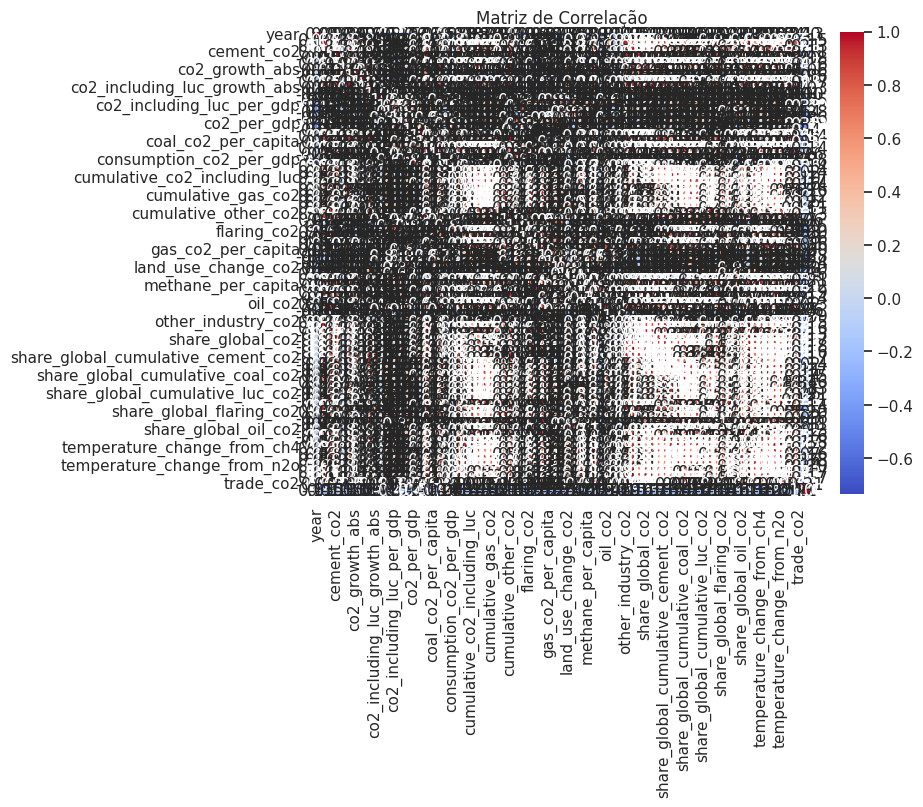

              year    population           gdp   cement_co2  \
count  1320.000000  1.320000e+03  1.320000e+03  1320.000000   
mean   2005.088636  6.598715e+07  1.282644e+12    16.831376   
std       8.938957  2.007127e+08  2.881493e+12    78.403042   
min    1990.000000  3.653960e+05  4.761400e+09     0.000000   
25%    1997.000000  5.143456e+06  1.122325e+11     0.751000   
50%    2005.000000  1.045966e+07  2.934730e+11     2.075500   
75%    2013.000000  4.895228e+07  1.297810e+12     7.737500   
max    2020.000000  1.424930e+09  2.415184e+13   858.233000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count            1320.000000   1320.000000     1320.000000      1320.000000   
mean                0.225933    507.201387        4.823328        -0.438046   
std                 0.184197   1343.303530       66.574659         6.219552   
min                 0.000000      1.356000     -547.517000       -44.029000   
25%                 0.124000     40.9

In [ ]:
# Célula 3: Análise e pré-processamento dos dados
# Remove linhas com valores ausentes
data.dropna(inplace=True)

# Filtrar apenas colunas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Analisando a correlação entre variáveis
important_vars = ['co2', 'gdp', 'energy_per_capita', 'population']  # Ajuste conforme necessário
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

# Verificar algumas estatísticas descritivas
print(numeric_data.describe())

In [ ]:
# Verificar as colunas do DataFrame
print(data.columns)

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

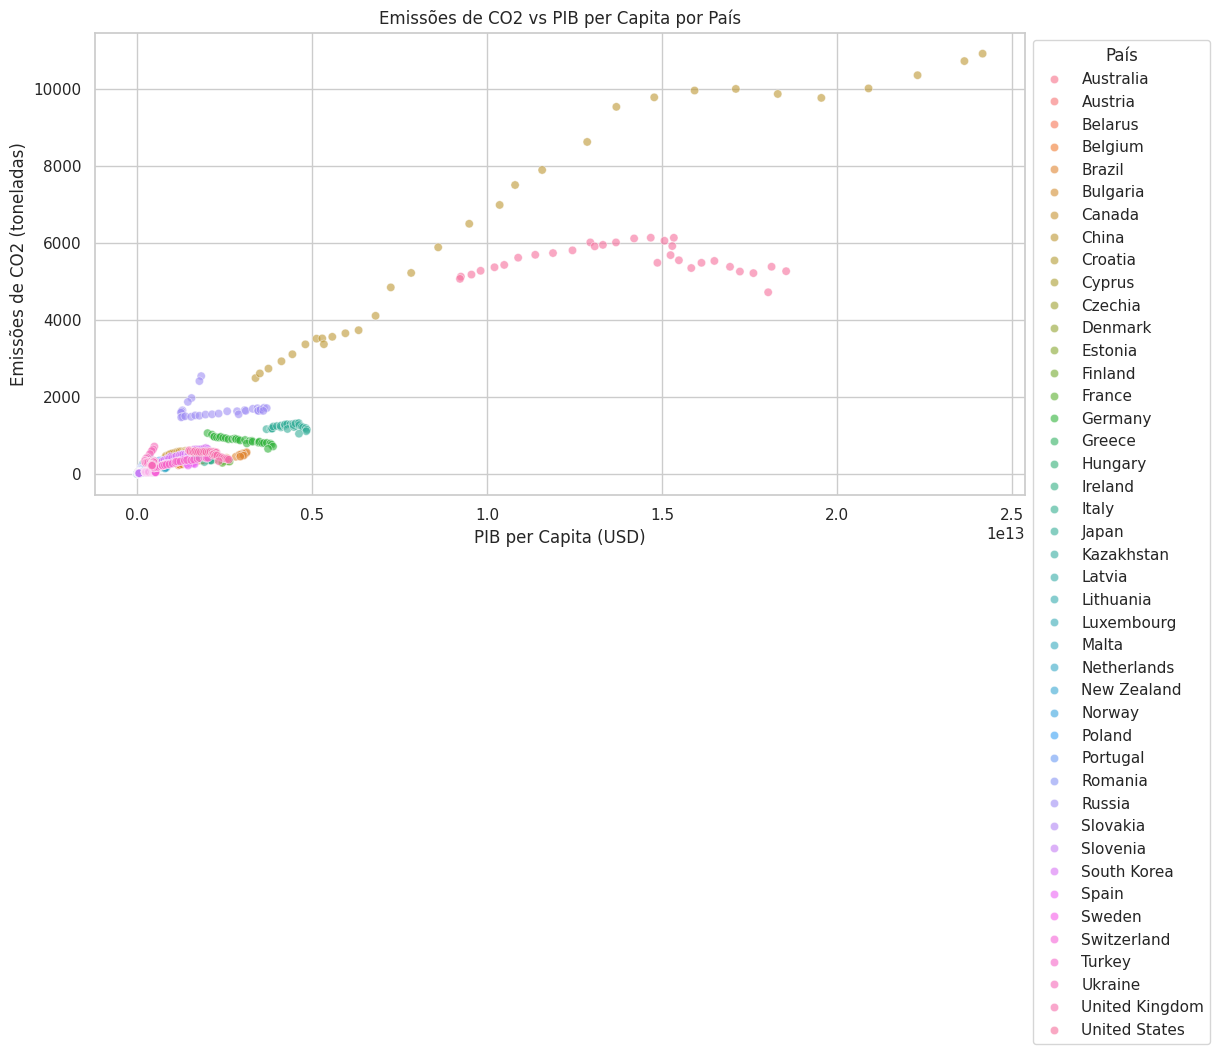

In [ ]:
# Célula 4: Análise Exploratória de Dados
# Scatter plot de emissões de CO2 versus PIB per capita
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='gdp', y='co2', hue='country', alpha=0.6)
plt.title('Emissões de CO2 vs PIB per Capita por País')
plt.xlabel('PIB per Capita (USD)')
plt.ylabel('Emissões de CO2 (toneladas)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='País')
plt.show()

In [ ]:
# Célula 5: Preparando os dados para treinamento
# Selecionando algumas variáveis relevantes para a previsão
X = data[['gdp', 'energy_per_capita', 'population']]  # Ajuste se necessário para o seu dataset
y = data['co2']  # Pegada de CO2

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Célula 6: Treinamento do modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Célula 7: Fazendo previsões
y_pred = model.predict(X_test)

In [ ]:
# Célula 8: Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nMSE do modelo: {mse:.2f}')
print(f'R² do modelo: {r2:.2f}')


MSE do modelo: 110082.80
R² do modelo: 0.96


In [ ]:
# Célula 9: Recomendações personalizadas
def recommend_actions(gdp, energy_consumption, population):
    # Previsão da pegada de carbono com base nas entradas
    predicted_footprint = model.predict(np.array([[gdp, energy_consumption, population]]))[0]

    if predicted_footprint < 0:
        predicted_footprint = 0  # Ajuste para evitar valores negativos

    print(f'A sua pegada de carbono prevista é de {predicted_footprint:.2f} toneladas de CO2.')

    # Ajustando limites para recomendações
    if predicted_footprint > 1000:  # Este limite pode ser ajustado conforme necessário
        print("Sua pegada de carbono é alta. Considere implementar as seguintes ações de redução:")
        print("Transição para Energias Renováveis**: Aumentar a proporção de energia proveniente de fontes renováveis, como solar e eólica.")
        print("Eficiência Energética**: Promover medidas para aumentar a eficiência energética nas indústrias.")
        print("Educação e Conscientização**: Incentivar práticas de consumo sustentável entre a população.")
    elif predicted_footprint > 500:
        print("Sua pegada de carbono está acima da média. Considere ajustes em seu consumo.")
        print("- Avalie o uso de fontes de energia alternativas e faça um plano para reduzir seu consumo energético.")
    else:
        print("Sua pegada de carbono está dentro de limites razoáveis. Bom trabalho!")

In [ ]:
# Célula 10: Interação com o usuário para recomendações
gdp = float(input("Digite o PIB per capita (USD) (mínimo 1000 USD): "))
if gdp < 1000:  # Corrigido para usar 'gdp' em vez de 'gdp_per_capita'
    print("O PIB per capita deve ser maior que 1000 USD.")
else:
    energy_consumption = float(input("Digite o consumo de energia (toneladas de óleo equivalente) (mínimo 1.0): "))
    if energy_consumption <= 0:
        print("O consumo de energia deve ser maior que 0.")
    else:
        population = float(input("Digite a população (mínimo 1000): "))
        if population < 1000:
            print("A população deve ser maior que 1000.")
        else:
            recommend_actions(gdp, energy_consumption, population)  # Chamada à função que fornece recomendações


Digite o PIB per capita (USD) (mínimo 1000 USD): 70000
Digite o consumo de energia (toneladas de óleo equivalente) (mínimo 1.0): 8.0
Digite a população (mínimo 1000): 331000000
A sua pegada de carbono prevista é de 522.84 toneladas de CO2.
Sua pegada de carbono está acima da média. Considere ajustes em seu consumo.
- Avalie o uso de fontes de energia alternativas e faça um plano para reduzir seu consumo energético.


In [ ]:
# Célula 11: Metacognição
feedback = input("O modelo atendeu suas expectativas? (sim/não): ")

if feedback.lower() == 'não':
    suggestion = input("Por favor, forneça suas sugestões para melhorar o modelo: ")
    print("Obrigado pelo seu feedback! Você sugeriu:", suggestion)
else:
    print("Fico feliz que o modelo atendeu suas expectativas!")


O modelo atendeu suas expectativas? (sim/não): não
Por favor, forneça suas sugestões para melhorar o modelo: top
Obrigado pelo seu feedback! Você sugeriu: top
